In [11]:
from tensorflow import keras
print('keras: ', keras.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU')) 

keras:  2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17943850544141902268
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9988323456
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12982863783425856474
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1"
]
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
import os
import pandas as pd
import numpy as np
base_dir = 'archive'

direList = os.path.join(base_dir, 'asl_alphabet_train/asl_alphabet_train')
traindf = pd.read_csv(base_dir + '/static_train.csv', error_bad_lines=False)
traindf.fillna(inplace = True, value = 0)


y = traindf['word']
x = traindf.iloc[:, 2:len(traindf.columns)]
x = x.values
x = x.reshape(-1, 21, 3)
del traindf['word']
del traindf['hand']


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, shuffle=True)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

print(y_test.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(26100, 29)
(60900, 29)
(26100, 21, 3)
(60900, 21, 3)


In [30]:
dire = os.listdir(
    'archive/asl_alphabet_train/asl_alphabet_train')
print(dire)
len(os.listdir(direList))

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


29

In [24]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(21,3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(len(os.listdir(direList)) , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 21, 512)           2048      
_________________________________________________________________
dense_17 (Dense)             (None, 21, 256)           131328    
_________________________________________________________________
dense_18 (Dense)             (None, 21, 128)           32896     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 29)                77981     
Total params: 244,253
Trainable params: 244,253
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train,y_train, batch_size = 32,epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
1904/1904 [==============================] - 11s 5ms/step - loss: 1.5316 - accuracy: 0.5867 - val_loss: 0.9691 - val_accuracy: 0.7375
Epoch 2/25
1904/1904 [==============================] - 9s 5ms/step - loss: 0.9071 - accuracy: 0.7612 - val_loss: 0.8699 - val_accuracy: 0.7713
Epoch 3/25
1904/1904 [==============================] - 9s 5ms/step - loss: 0.8515 - accuracy: 0.7736 - val_loss: 0.8509 - val_accuracy: 0.7764
Epoch 4/25
1904/1904 [==============================] - 9s 5ms/step - loss: 0.8274 - accuracy: 0.7794 - val_loss: 0.8166 - val_accuracy: 0.7842
Epoch 5/25
1904/1904 [==============================] - 9s 5ms/step - loss: 0.7918 - accuracy: 0.7870 - val_loss: 0.7794 - val_accuracy: 0.7925
Epoch 6/25
1904/1904 [==============================] - 10s 5ms/step - loss: 0.7659 - accuracy: 0.7955 - val_loss: 0.7914 - val_accuracy: 0.7877- loss: 0.7657 - 
Epoch 7/25
1904/1904 [==============================] - 11s 6ms/step - loss: 0.7567 - accuracy: 0.7954 - val_loss: 0.

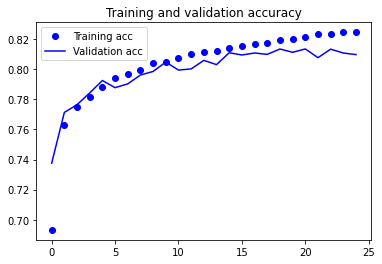

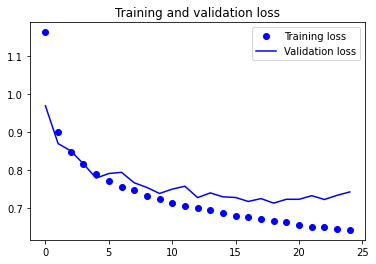

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# evaluate
testdf = pd.read_csv(base_dir + '/static_test.csv', error_bad_lines=False)
testdf.fillna(inplace = True, value = 0)

y = testdf['word']
x = testdf.iloc[:, 2:len(testdf.columns)]
x = x.values
x_actualtest = x.reshape(-1, 21, 3)

label_binarizer = LabelBinarizer()
y_actualtest = label_binarizer.fit_transform(y)

y_actualtest.shape
x_actualtest.shape
model.evaluate(x_actualtest, y_actualtest)

1/1 [==============================] - 0s 14ms/step - loss: 0.8769 - accuracy: 0.7586


[0.8769142031669617, 0.7586206793785095]

In [31]:
def prediction(model, array, items_l):
    prob = model.predict(array.reshape(-1, 21, 3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

prob_df, result = prediction(model, x_actualtest[25], dire)
print('The prediction is: ', result, '\n\n', prob_df)

print(x_actualtest[25])

The prediction is:  T 

               A             B             C             D           del  \
0  1.077628e-19  1.110197e-23  7.618386e-35  1.529925e-33  1.434846e-07   

              E             F             G             H             I  ...  \
0  1.065570e-16  1.180541e-31  1.462382e-28  6.800614e-34  5.190135e-21  ...   

              R             S         space    T             U             V  \
0  5.668744e-27  1.191627e-15  6.302513e-18  1.0  1.857700e-15  4.260120e-33   

              W             X    Y             Z  
0  9.552047e-23  1.069531e-34  0.0  5.022355e-30  

[1 rows x 29 columns]
[[ 2.6224542e-01  9.1816145e-01 -1.5285921e-04]
 [ 4.0013412e-01  9.1367700e-01 -1.5112565e-01]
 [ 4.6398920e-01  8.0253404e-01 -2.3421150e-01]
 [ 3.4226520e-01  7.0758730e-01 -2.8246897e-01]
 [ 2.0763567e-01  6.3715255e-01 -2.7010632e-01]
 [ 4.9119592e-01  5.8225363e-01 -1.5797919e-01]
 [ 5.7623947e-01  4.2501570e-01 -2.6932746e-01]
 [ 6.3034750e-01  3.1523260e-01 -3.586178

In [32]:
model.save('testModel.h5')